# Лабораторная работа №5. Линейные методы. Часть 1

### Линейный классификатор

Основная идея линейного классификатора заключается в том, что признаковое пространство может быть разделено гиперплоскостью на две полуплоскости, в каждой из которых прогнозируется одно из двух значений целевого класса. 
Если это можно сделать без ошибок, то обучающая выборка называется *линейно разделимой*.

<img src="./imgs/logit.png">

Мы уже знакомы с линейной регрессией и методом наименьших квадратов. Рассмотрим задачу бинарной классификации, причем метки целевого класса обозначим "+1" (положительные примеры) и "-1" (отрицательные примеры).
Один из самых простых линейных классификаторов получается на основе регрессии вот таким образом:

$$a(\textbf{x}) = \text{sign}(\textbf{w}^{\text{T}}\textbf x),$$

где $\textbf{x}$ – вектор признаков примера (вместе с единицей), $\textbf{w}$ – веса в линейной модели (вместе со смещением $w_0$), $\text{sign}(\bullet)$ – функция "сигнум", возвращающая знак своего аргумента, $a(\textbf{x})$ – ответ классификатора на примере $\textbf{x}$.



### Логистическая регрессия 
Логистическая регрессия является частным случаем линейного классификатора, но она обладает хорошим "умением" – прогнозировать вероятность $p_+$ отнесения примера $\textbf{x}_\text{i}$ к классу "+":
$$p_+ = \text P\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) $$

Прогнозирование не просто ответа ("+1" или "-1"), а именно *вероятности* отнесения к классу "+1" во многих задачах является очень важным бизнес-требованием. Например, в задаче кредитного скоринга, где традиционно применяется логистическая регрессия, часто прогнозируют вероятность невозврата кредита ($p_+$). Клиентов, обратившихся за кредитом, сортируют по этой предсказанной вероятности (по убыванию), и получается скоркарта — по сути, рейтинг клиентов от плохих к хорошим. Ниже приведен игрушечный пример такой скоркарты.
<img src='./imgs/toy_scorecard.png' width=30%>

Банк выбирает для себя порог $p_*$ предсказанной вероятности невозврата кредита (на картинке – $0.15$) и начиная с этого значения уже не выдает кредит. Более того, можно умножить предсказнную вероятность на выданную сумму и получить матожидание потерь с клиента, что тоже будет хорошей бизнес-метрикой.

Обозначим $P(X)$ вероятностью происходящего события $X$. Тогда введем отношение вероятностей $OR(X)$, которое будет определяться как $\frac{P(X)}{1-P(X)}$, а это — отношение вероятностей того, произойдет ли событие или не произойдет. В то время как $P(X)$ находится в пределах от 0 до 1, $OR(X)$ находится в пределах от 0 до $\infty$. Если вычислить логарифм $OR(X)$ (то есть называется *логарифм шансов*, или *логарифм отношения вероятностей*), то легко заметить, что $\log{OR(X)} \in \mathbb{R}$. 

В модели логистической регрессии предполагается, что логарифм отношения шансов на то, что объект будет отнесен к классу "+1", а не к классу "-1" будет определяться простой зависимостью от значений признаков: $$ \log(OR_{+}) = \log\big(\frac{p_{+}}{1 - p_{+}}\big) = w_{0}+w_{1}x_1 + w_{2}x_2 + ... = \textbf{w}^\text{T}\textbf{x}.$$

Тогда можно вычислить $p_{+}$ и $p_{-}$с помощью простых зависимостей:

$$p_{+} = \frac{OR_{+}}{1 + OR_{+}} = \frac{\exp^{\textbf{w}^\text{T}\textbf{x}}}{1 + \exp^{\textbf{w}^\text{T}\textbf{x}}} =  \frac{1}{1 + \exp^{-\textbf{w}^\text{T}\textbf{x}}} = \sigma(\textbf{w}^\text{T}\textbf{x}),$$

$$p_{-} = 1 - p_{+} = \sigma(-\textbf{w}^\text{T}\textbf{x}).$$

Где введено обозначение $\sigma(z)$ для так называемой логистической функции: $$\sigma(z) = \frac{1}{1 + \exp^{-z}}.$$

Построим ее график.

In [1]:
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def sigma(z):
    return 1. / (1 + np.exp(-z))

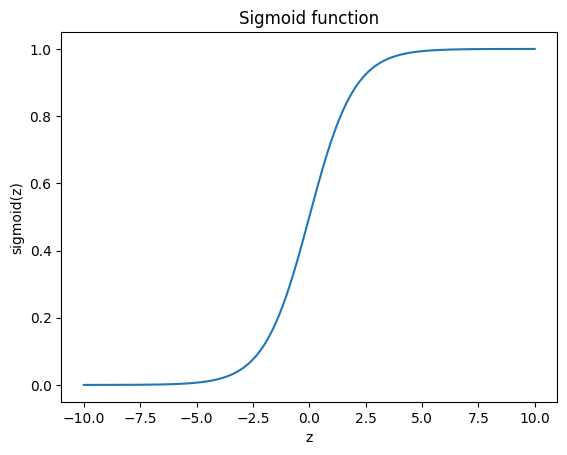

In [3]:
xx = np.linspace(-10, 10, 1000)
plt.plot(xx, [sigma(x) for x in xx]);
plt.xlabel('z');
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid function');

### Принцип максимального правдоподобия
Для обучения модели логистической регрессии используется принцип максимального правдоподобия. Только что мы увидели, что логистическая регрессия моделирует вероятность отнесения примера к классу "+1" как 

$$p_+(\textbf{x}_\text{i}) = \text{P}\left(y_i = 1 \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i})$$

Тогда для класса "-1" аналогичная вероятность:
$$p_-(\textbf{x}_\text{i})  = \text{P}\left(y_i = -1 \mid \textbf{x}_\text{i}, \textbf{w}\right)  = 1 - \sigma(\textbf{w}^\text{T}\textbf{x}_\text{i}) = \sigma(-\textbf{w}^\text{T}\textbf{x}_\text{i}) $$

Оба этих выражения можно объединить в одно (следите за моими руками – не обманывают ли вас):

$$\text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \sigma(y_i\textbf{w}^\text{T}\textbf{x}_\text{i})$$

Выражение $M(\textbf{x}_\text{i}) = y_i\textbf{w}^\text{T}\textbf{x}_\text{i}$ называется *отступом* (*margin*) классификации на объекте $\textbf{x}_\text{i}$. Если он неотрицателен, модель не ошибается на объекте $\textbf{x}_\text{i}$, если же отрицателен – значит, класс для $\textbf{x}_\text{i}$  спрогнозирован неправильно. 

**Важно: отступ определен для объектов именно обучающей выборки, для которых известны реальные метки целевого класса $y_i$.**

Отступ – это своего рода "уверенность" модели в классификации объекта $\textbf{x}_\text{i}$: 

- если отступ большой (по модулю) и положительный, это значит, что метка класса поставлена правильно, а объект находится далеко от разделяющей гиперплоскости (такой объект классифицируется уверенно). На рисунке – $x_3$.
- если отступ большой (по модулю) и отрицательный, значит метка класса поставлена неправильно, а объект находится далеко от разделюящей гиперплоскости (скорее всего такой объект – аномалия, например, его метка в обучающей выборке поставлена неправильно). На рисунке – $x_1$.
- если отступ малый (по модулю), то объект находится близко к разделюящей гиперплоскости, а  знак отступа определяет, правильно ли объект классифицирован.  На рисунке – $x_2$ и $x_4$.
<img src = './imgs/margin.png' width=60%>

Теперь запишем правдоподобие обучающей выборки, то есть вероятность наблюдать данный вектор $\textbf{y}$ у выборки $\textbf X$. Делаем сильное предположение: объекты приходят независимо, из одного распределения (*i.i.d.*). Тогда

$$\text{P}\left(\textbf{y} \mid \textbf X, \textbf{w}\right) = \prod_{i=1}^{\ell} \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right),$$
где $\ell$ – длина выборки $\textbf X$ (число строк).

Возьмем логарифм данного выражения (сумму оптимизировать намного проще, чем произведение):
$$\log \text{P}\left(\textbf{y} \mid \textbf X, \textbf{w}\right) = \log \sum_{i=1}^{\ell} \text{P}\left(y = y_i \mid \textbf{x}_\text{i}, \textbf{w}\right) = \log \prod_{i=1}^{\ell} \sigma(y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}) = \sum_{i=1}^{\ell} \log \sigma(y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}) = \sum_{i=1}^{\ell} \log \frac{1}{1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}} = - \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}})$$

То есть принцип максимизации правдоподобия для задачи логистической регрессии приводит к минимизации выражения
$$\mathcal{L_{log}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}).$$

Это так называемая *логистическая функция потерь*, просуммированная по всем объектам обучающей выборки.

Посмотрим на новую фунцию как на функцию от отступа: $L(M) = \log (1 + \exp^{-M})$. Нарисуем ее график, а также график 1/0 функциий потерь (*zero-one loss*), которая просто штрафует модель на 1 за ошибку на каждом объекте (отступ отрицательный): $L_{1/0}(M) = [M < 0]$.
<img src = './imgs/logloss_margin.png' width=60%>

Картинка отражает общую идею, что в задаче классификации, не умея напрямую минимизировать число ошибок (по крайней мере, градиентными методами это не сделать – производная 1/0 функциий потерь в нуле обращается в бесконечность), мы минимизируем некоторую ее верхнюю оценку. В данном случае это логистическая функция потерь (где логарифм двоичный, но это не принципиально), и справедливо 
$$\mathcal{L_{\text{1/0}}} (\textbf X, \textbf{y}, \textbf{w}) = \sum_{i=1}^{\ell} [M(\textbf{x}_\text{i}) < 0] \leq \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}), $$
где $\mathcal{L_{\text{1/0}}} (\textbf X, \textbf{y}, \textbf{w})$ – попросту число ошибок логистической регрессии с весами $\textbf{w}$ на выборке $(\textbf X, \textbf{y})$.

То есть уменьшая верхнюю оценку $\mathcal{L_{\log}}$ на число ошибок классификации, мы таким образом надеемся уменьшить и само число ошибок.

### L2-регуляризация логистической функции потерь

$L2-регуляризация$ логистической регрессии устроена следующим образом. Минимизируется следующий функционал:
$$J(\textbf X, \textbf{y}, \textbf{w}) = \mathcal{L_{\log}} (\textbf X, \textbf{y}, \textbf{w}) + \lambda |\textbf{w}|^2$$

В случае логистической регрессии принято введение обратного коэффициента регуляризации $C = \frac{1}{\lambda}$. И тогда решением задачи будет
$$\widehat{\textbf{w}}  = \arg \min_{\textbf{w}} J(\textbf X, \textbf{y}, \textbf{w}) =  \arg \min_{\textbf{w}}\ (C\sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}})+ |\textbf{w}|^2)$$ 

Далее рассмотрим пример, позволяющий интуитивно понять один из смыслов регуляризации. 

### Пример применения логистической регрессии с L2-регуляризацией

In [4]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

Посмотрим, как регуляризация влияет на качество классификации на наборе данных по тестированию микрочипов из курса Andrew Ng по машинному обучению. 
Будем использовать логистическую регрессию с полиномиальными признаками и варьировать параметр регуляризации C.
Сначала посмотрим, как регуляризация влияет на разделяющую границу классификатора, интуитивно распознаем переобучение и недообучение.
Потом численно установим близкий к оптимальному параметр регуляризации с помощью кросс-валидации (`cross-validation`) и  перебора по сетке (`GridSearch`). 

Загружаем данные с помощью метода `read_csv` библиотеки `pandas`. В этом наборе данных для 118 микрочипов (объекты) указаны результаты двух тестов по контролю качества (два числовых признака) и сказано, пустили ли микрочип в производство. Признаки уже центрированы, то есть из всех значений вычтены средние по столбцам. Таким образом, "среднему" микрочипу соответствуют нулевые значения результатов тестов.

In [7]:
# загрузка данных
data = pd.read_csv('./data/microchip_tests.txt',
                   header=None, names = ('test1','test2','released'))
# информация о наборе данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   test1     118 non-null    float64
 1   test2     118 non-null    float64
 2   released  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [8]:
data.head()

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Сохраним обучающую выборку и метки целевого класса в отдельных массивах NumPy.

In [11]:
X = data.iloc[:,:2].values
y = data.iloc[:,2].values

Отобразим данные. Красный цвет соответствует бракованным чипам, зеленый – нормальным.  

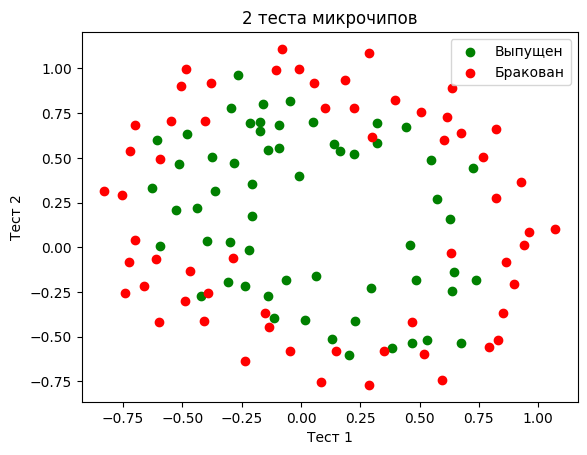

In [12]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов')
plt.legend();

Определим функцию для отображения разделяющей кривой классификатора:

In [13]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))


    # каждой точке в сетке [x_min, m_max]x[y_min, y_max]
    # ставим в соответствие свой цвет
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

Назовём полиномиальными признаками до степени $d$ для двух переменных $x_1$ и $x_2$ следующие величины:
$$\{x_1^d, x_1^{d-1}x_2, \ldots x_2^d\} =  \{x_1^ix_2^j\}_{i+j=d, i,j \in \mathbb{N}}$$

Например, для $d=3$ это будут следующие признаки:
$$1, x_1, x_2,  x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_2^3$$

Нарисовав треугольник Пифагора, можно вычислить, сколько таких признаков будет для $d=4,5...$ и вообще для любого $d$.
Попросту говоря, таких признаков экспоненциально много, и строить, скажем, для 100 признаков полиномиальные степени 10 может оказаться затратно (а более того, и не нужно).

Создадим объект `sklearn`, который добавит в матрицу $X$ полиномиальные признаки вплоть до степени 7.

In [14]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)
X_poly.shape

(118, 36)

Обучим логистическую регрессию с параметром регуляризации $C = 10^{-2}$. Изобразим разделяющую границу.
Также проверим долю правильных ответов классификатора на обучающей выборке. Видим, что регуляризация оказалась 
слишком сильной, и модель "недообучилась".

Доля правильных ответов классификатора на обучающей выборке: 0.627


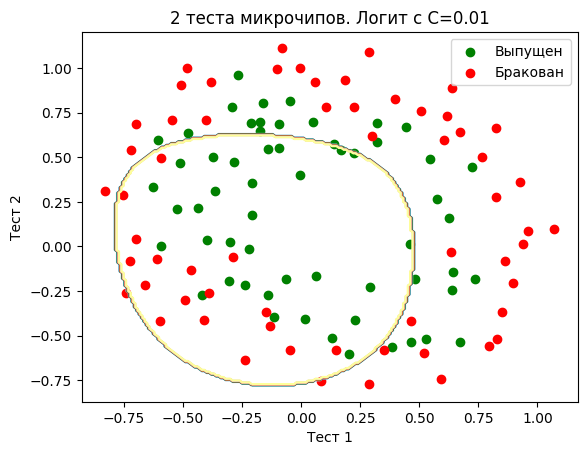

In [15]:
C = 1e-2
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=0.01')
plt.legend();

print("Доля правильных ответов классификатора на обучающей выборке:", 
      round(logit.score(X_poly, y), 3))

Увеличим $C$ до 1. Тем самым мы *ослабляем* регуляризацию, теперь в решении значения весов логистической регрессии могут оказаться больше (по модулю), чем в прошлом случае.

Доля правильных ответов классификатора на обучающей выборке: 0.831


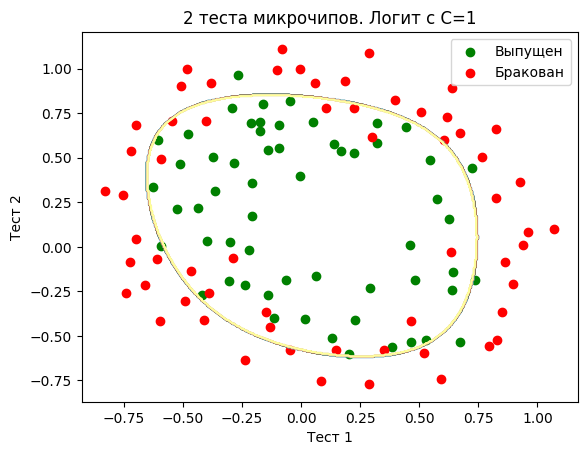

In [16]:
C = 1
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=1')
plt.legend();

print("Доля правильных ответов классификатора на обучающей выборке:", 
      round(logit.score(X_poly, y), 3))

Еще увеличим $C$ – до десяти тысяч. Теперь регуляризации явно недостаточно, и мы наблюдаем переобучение. Можно заметить, что в прошлом случае (при $C$=1 и "гладкой" границе) доля правильных ответов модели на обучающей выборке не намного ниже, чем в 3 случае, зато на новой выборке, можно себе представить, 2 модель сработает намного лучше.

Доля правильных ответов классификатора на обучающей выборке: 0.873


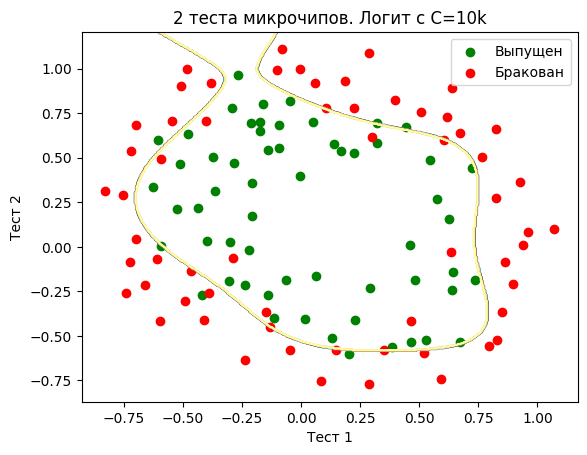

In [17]:
C = 1e4
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=10k')
plt.legend();

print("Доля правильных ответов классификатора на обучающей выборке:", 
      round(logit.score(X_poly, y), 3))

Чтобы обсудить результаты, перепишем формулу для функционала, который оптимизируется в логистической регрессии, в таком виде:
$$J(X,y,w) = \mathcal{L} + \frac{1}{C}||w||^2,$$
где $\mathcal{L}$ – логистическая функция потерь, просуммированная по всей выборке, $C$ – обратный коэффициент регуляризации (тот самый $C$ в `sklearn`-реализации `LogisticRegression`).

**Промежуточные выводы**:
 - чем больше параметр $C$, тем более сложные зависимости в данных может восстанавливать модель (интуитивно $C$ соответствует "сложности" модели (model capacity))
 - если регуляризация слишком сильная (малые значения $C$), то решением задачи минимизации логистической функции потерь может оказаться то, когда многие веса станут слишком малыми (или вообще нулевыми). Еще говорят, что модель недостаточно "штрафуется" за ошибки (то есть в функционале $J$ "перевешивает" сумма квадратов весов, а ошибка $\mathcal{L}$ может быть относительно большой). В таком случае модель окажется *недообученной* (1 случай)
 - наоборот, если регуляризация слишком слабая (большие значения $C$), то решением задачи оптимизации может стать вектор $w$ с большими по модулю  компонентами. В таком случае больший вклад в оптимизируемый функционал $J$ имеет  $\mathcal{L}$ и, вольно выражаясь, модель слишком "боится" ошибиться на объектах обучающей выборки, поэтому окажется *переобученной* (3 случай)
 - то, какое значение $C$ выбрать, сама логистическая регрессия "не поймет" (или еще говорят "не выучит"), то есть это не может быть определено решением оптимизационной задачи, которой является логистическая регрессия (в отличие от весов $w$). Так же точно, дерево решений не может "само понять", какое ограничение на глубину выбрать (за один процесс обучения). Поэтому $C$ – это *гиперпараметр* модели, который настраивается на кросс-валидации, как и *max_depth* для дерева.
 
Теперь найдем оптимальное (в данном примере) значение параметра регуляризации $C$. Сделать это можно с помощью `LogisticRegressionCV` – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали `GridSearchCV`, `RandomizedSearchCV` или, например, специальные алгоритмы оптимизации гиперпараметров, реализованные в `hyperopt`.

In [18]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(X_poly, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    3.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.9s finished


LogisticRegressionCV(Cs=array([1.00000000e-02, 1.02334021e-02, 1.04722519e-02, 1.07166765e-02,
       1.09668060e-02, 1.12227736e-02, 1.14847155e-02, 1.17527712e-02,
       1.20270833e-02, 1.23077980e-02, 1.25950646e-02, 1.28890361e-02,
       1.31898690e-02, 1.34977233e-02, 1.38127630e-02, 1.41351558e-02,
       1.44650734e-02, 1.48026913e-02, 1.51481892e-02, 1.55017512e-02,
       1.58635653e-02, 1.62...
       6.45088409e+02, 6.60144909e+02, 6.75552832e+02, 6.91320378e+02,
       7.07455942e+02, 7.23968114e+02, 7.40865683e+02, 7.58157646e+02,
       7.75853206e+02, 7.93961785e+02, 8.12493021e+02, 8.31456781e+02,
       8.50863158e+02, 8.70722485e+02, 8.91045332e+02, 9.11842520e+02,
       9.33125118e+02, 9.54904456e+02, 9.77192128e+02, 1.00000000e+03]),
                     cv=StratifiedKFold(n_splits=10, random_state=17, shuffle=True),
                     n_jobs=-1, verbose=1)

In [19]:
logit_searcher.C_

array([3.93722633])

Посмотрим, как качество модели (доля правильных ответов на обучающей и валидационной выборках) меняется при изменении гиперпараметра $C$.

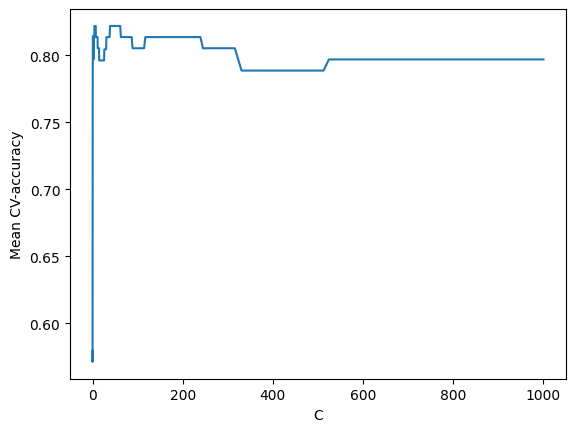

In [20]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');

Выделим участок с "лучшими" значениями C.

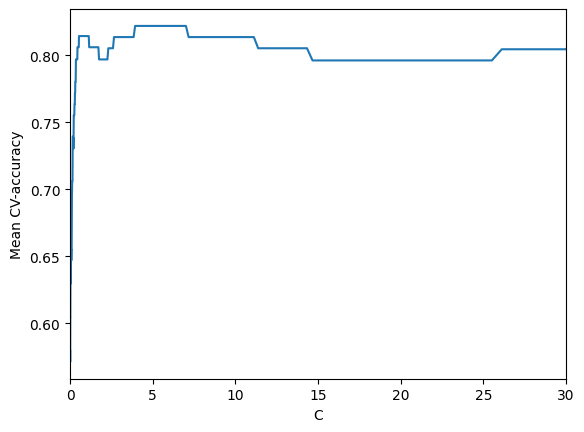

In [21]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');
plt.xlim((0,30));

Использованы материалы **"Открытого курса по машинному обучению"**. Авторы: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий и Data Scientist в Segmento Екатерина Демидова. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.